# Genotype-Phenotype Analysis for Stolerman Neurodevelopmental Syndrome (OMIM #618505)

[Stolerman Neurodevelopmental Syndrome](https://omim.org/entry/618505?search=618505) is a rare developmental disorder caused by pathogenic variants in the *KDM6B* gene. This syndrome is characterized by motor and speech delay, mildly impaired intellectual development (in most patients), learning difficulties, and behavioral abnormalities, including autism spectrum disorder. Psychosis is observed in a small percentage of individuals over the age of 12 years. Most individuals have nonspecific and mild dysmorphic facial features without a common gestalt. A subset of patients may have involvement of other organ systems, including gastrointestinal with poor early feeding or gastroesophageal reflux, distal skeletal anomalies, and congenital heart defects. Most mutations occur de novo, but rare autosomal dominant inheritance with incomplete penetrance has been observed 

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using genophenocorr version 0.9.4


### KDM6B
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for KDM6B.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'KDM6B'
mane_tx_id = 'NM_001348716.2'
mane_protein_id = 'NP_001335645.1'
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store('0.1.24') as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
validation.summarize()

Individuals Processed: 100%|██████████| 73/73 [00:00<00:00, 538.75 individuals/s]
Validated under permissive policy
Showing errors and warnings
Phenopackets
  patient #12
    phenotype-features
     warnings:
     ·Maternal diabetes [HP:0009800] is not a descendant of Phenotypic abnormality [HP:0000118]
  patient #18
    phenotype-features
     warnings:
     ·Maternal diabetes [HP:0009800] is not a descendant of Phenotypic abnormality [HP:0000118]
  patient #67
    phenotype-features
     warnings:
     ·Maternal diabetes [HP:0009800] is not a descendant of Phenotypic abnormality [HP:0000118]


In [4]:
from gpsea.view import CohortViewer
viewer = CohortViewer(hpo)
viewer.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
61,Delayed speech and language development
57,Motor delay
39,Autistic behavior
32,Hypotonia
22,Feeding difficulties
20,Joint hypermobility
15,Macrocephaly
15,Sleep abnormality
13,"Intellectual disability, mild"
13,Attention deficit hyperactivity disorder


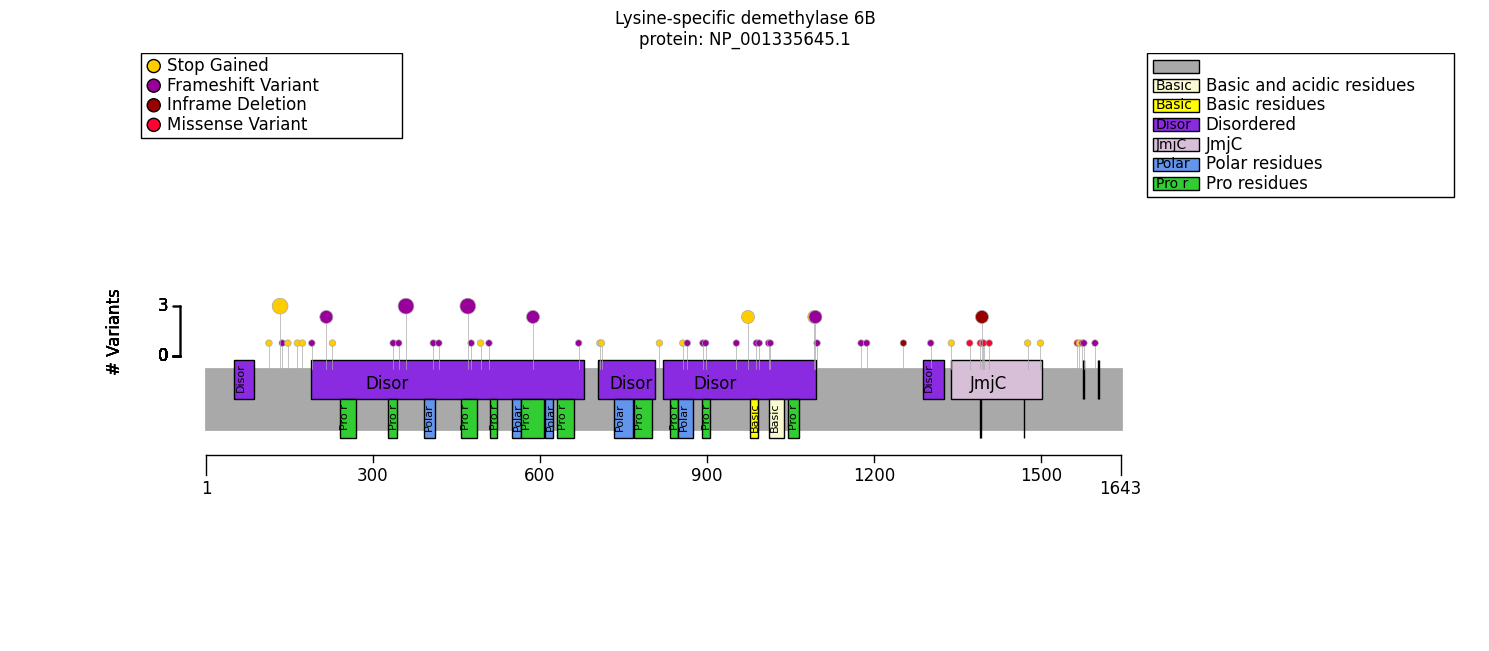

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

kdm6b_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
kdm6b_fig.tight_layout()

In [6]:
from gpsea.view import CohortVariantViewer
viewer = CohortVariantViewer(tx_id=mane_tx_id)
viewer.process(cohort=cohort)

Count,Variant key,HGVS,Overlapping Exons,Effects
3,17_7847703_7847705_CCT_C,c.1416_1417del (p.Cys473SerfsTer36),12,frameshift
3,17_7847275_7847279_TAGAG_T,c.1085_1088del (p.Glu362AlafsTer124),11,frameshift
3,17_7846244_7846244_C_T,c.403C>T (p.Arg135Ter),7,stop gained
2,17_7851969_7851972_ACTT_A,c.4187_4189del (p.Phe1396del),19,inframe deletion
2,17_7849569_7849569_C_A,c.3281C>A (p.Ser1094Ter),12,stop gained
2,17_7846682_7846684_CAG_C,c.654_655del (p.Glu220GlyfsTer16),9,frameshift
2,17_7848054_7848055_GC_G,c.1769del (p.Pro590GlnfsTer13),12,frameshift
2,17_7849573_7849577_TAGTG_T,c.3288_3291del (p.Ser1096ArgfsTer7),12,frameshift
2,17_7849211_7849211_C_T,c.2923C>T (p.Arg975Ter),12,stop gained
1,17_7849332_7849332_G_GC,c.3046dup (p.Arg1016ProfsTer17),12,frameshift


In [7]:
from gpsea.view import ProteinVariantViewer
viewer = ProteinVariantViewer(protein_meta, mane_tx_id)
viewer.process(cohort)

Count,Name,Type,Coordinates,Variants
0,Disordered,Region,53 - 88,
20,Disordered,Region,191 - 680,p.Phe671Ter; p.Glu220GlyfsTer16; p.Cys473SerfsTer36; p.Gly193GlufsTer5; p.Arg513ProfsTer42; p.Gly412SerfsTer77; p.Pro481ThrfsTer29; p.Glu362AlafsTer124; p.Ala352ProfsTer134; p.Arg340AlafsTer147; p.Gly421LeufsTer85; p.Arg495Ter; p.Pro590GlnfsTer13; p.Arg229Ter
0,Pro residues,Compositional bias,242 - 270,
1,Pro residues,Compositional bias,329 - 344,p.Arg340AlafsTer147
1,Polar residues,Compositional bias,393 - 412,p.Gly412SerfsTer77
4,Pro residues,Compositional bias,459 - 487,p.Cys473SerfsTer36; p.Pro481ThrfsTer29
1,Pro residues,Compositional bias,511 - 524,p.Arg513ProfsTer42
0,Polar residues,Compositional bias,552 - 566,
2,Pro residues,Compositional bias,568 - 608,p.Pro590GlnfsTer13
0,Polar residues,Compositional bias,611 - 624,


# Genotype-Phenotype Correlation (GPC) Analysis
Lets investigate the JmjC domain versus the rest of the cohort. This region seems to start at 7851650 and end at 7852530, so we will filter the genomic coordinates based on that.

In [8]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [9]:
from gpsea.model.genome import Region
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.analysis.predicate import protein_feature
from gpsea.view import MtcStatsViewer

jmj = protein_feature(feature_id="JmjC", protein_metadata=protein_meta)

jmj_clf = monoallelic_classifier(
    a_predicate=jmj,
    b_predicate=~jmj,
    a_label='JmjC domain',
    b_label='Other'
)

jmj_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=jmj_clf,
    pheno_clfs=pheno_clfs,
)

mtc_viewer = MtcStatsViewer()
mtc_viewer.process(jmj_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,50
HMF03,Skipping term because of a child term with the same individual counts,2
HMF07,Skipping non phenotype term,3
HMF08,Skipping general term,99
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,483


In [10]:
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo, jmj_result)

Allele group,JmjC domain,Other,Corrected p values,p values
Intellectual disability [HP:0001249],1/7 (14%),28/43 (65%),0.618351,0.032545
Delayed speech and language development [HP:0000750],7/9 (78%),54/57 (95%),1.000000,0.133685
"Intellectual disability, mild [HP:0001256]",1/7 (14%),12/27 (44%),1.000000,0.210003
Motor delay [HP:0001270],7/9 (78%),50/55 (91%),1.000000,0.253344
Feeding difficulties [HP:0011968],3/4 (75%),19/47 (40%),1.000000,0.303025
Joint hypermobility [HP:0001382],2/4 (50%),20/48 (42%),1.000000,1.000000
Sleep abnormality [HP:0002360],2/5 (40%),16/49 (33%),1.000000,1.000000
Recurrent maladaptive behavior [HP:5200241],3/3 (100%),27/27 (100%),1.000000,1.000000
Abnormal muscle tone [HP:0003808],3/3 (100%),30/30 (100%),1.000000,1.000000
Hypotonia [HP:0001252],3/6 (50%),29/54 (54%),1.000000,1.000000


In [11]:
# Compare N and C terminal regions
from gpsea.analysis.predicate import protein_region

middle_residue = 1643 // 2
nterm = protein_region(region=Region(1, middle_residue), tx_id=mane_tx_id)
nterm_clf = monoallelic_classifier(
    a_predicate=nterm,
    b_predicate=~ nterm,
    a_label="N term",
    b_label="C term"
)

nterm_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=nterm_clf,
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo, nterm_result)

Allele group,N term,C term,Corrected p values,p values
Joint hypermobility [HP:0001382],13/23 (57%),9/29 (31%),1.0,0.091675
Motor delay [HP:0001270],23/28 (82%),34/36 (94%),1.0,0.224638
Hypotonia [HP:0001252],11/25 (44%),21/35 (60%),1.0,0.295593
"Intellectual disability, mild [HP:0001256]",7/14 (50%),6/20 (30%),1.0,0.296203
Sleep abnormality [HP:0002360],9/22 (41%),9/32 (28%),1.0,0.386333
Intellectual disability [HP:0001249],13/20 (65%),16/30 (53%),1.0,0.560156
Autistic behavior [HP:0000729],19/29 (66%),20/35 (57%),1.0,0.608815
Recurrent maladaptive behavior [HP:5200241],11/11 (100%),19/19 (100%),1.0,1.000000
Abnormal muscle tone [HP:0003808],12/12 (100%),21/21 (100%),1.0,1.000000
Abnormal axial skeleton morphology [HP:0009121],14/14 (100%),19/19 (100%),1.0,1.000000


# Summary

In [12]:
caption = "Stolerman et al (2016) identified no significant genotype-phenotype correlations \\cite{PMID_31124279}"

from gpseacs.report import  GPAnalysisResultSummary, GpseaAnalysisReport

f_results =  (
 GPAnalysisResultSummary.from_multi(
        result=jmj_result,
    ), GPAnalysisResultSummary.from_multi(
        result=nterm_result,
    ),
)

report = GpseaAnalysisReport(
    name=gene_symbol,
    cohort=cohort,
    fet_results=f_results,
    gene_symbol=gene_symbol,
    mane_tx_id=mane_tx_id,
    mane_protein_id=mane_protein_id,
    caption=caption,
)

In [13]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
JmjC domain,Other,19,0
Genotype (A),Genotype (B),Tests performed,Significant tests
N term,C term,19,0


In [14]:
summarizer.process_latex(report=report, protein_fig=kdm6b_fig)

Figure saved to ../../supplement/img/KDM6B_protein_diagram-draft.pdf
Output to ../../supplement/tex/KDM6B_summary_draft.tex
